# Following Along A Tutorial I Found For NBA API

In [1]:
import numpy as np
import pandas as pd
import json
import requests
from nba_api.stats.endpoints import shotchartdetail
import matplotlib as mpl
import matplotlib.pyplot as plt

### Load Data in Using JSON Files in a GitHub Repo

In [2]:
# Load Team JSON File
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

# Load Player JSON File
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [42]:
# Get team ID based on team name
def get_team_id(teamName):
  for team in teams:
    if team['teamName'] == teamName:
      return team['teamId']
  return -1

# Get player ID based on player name
def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

### Let's Now Test Our Functions

In [44]:
# Get Team ID of the Knicks
print(f"Knicks ID: {get_team_id('New York Knicks')}")

# Get Player ID for LeBron James
print(f"LeBron James ID: {get_player_id('LeBron', 'James')}")

Knicks ID: 1610612752
LeBron James ID: 2544


### Collecting Shot Data for Stephen Curry's 2015-16 MVP Season

In [46]:
# Create the JSON Request
shot_json = shotchartdetail.ShotChartDetail(
    team_id=get_team_id('Golden State Warriors'),
    player_id = get_player_id('Stephen', 'Curry'),
    context_measure_simple = 'PTS',
    season_nullable = '2015-16',
    season_type_all_star = 'Regular Season')


# context_measure_simple - determines which 'context' to use for searching for shots. 
# Points (PTS) is the default and will result in all made shots. 
# FGA would result in all attempts (makes and misses)


# season_type_all_star - specifies which portion of the season we are interested in.
# (Pre Season, Regular Season, Playoffs, All Star)


In [48]:
# Load data into a Python Dictionary
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

In [49]:
# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [54]:
# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

### Now We Need to Create A Court to Plot On

In [93]:
# Function to draw basketball court
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

In [103]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

### Creating The Curry Shot Chart

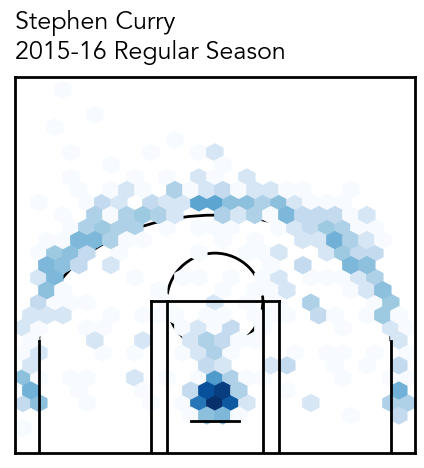

In [104]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Stephen Curry\n2015-16 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('CurryShotChart.png', dpi=300, bbox_inches='tight')
plt.show()